In [1]:
import parent

In [3]:
import torch
from torch import nn
#image_A, image_B = (x[0].cuda() for x in next(zip(d1_t, d2_t)))
class RegistrationTransformer(nn.Module):
    def __init__(self, size):
        self.size = size
        super(RegistrationTransformer, self).__init__()
        
        feature_n = 120
        self.position_embedding = nn.Parameter(
            torch.randn(((size // 7) **2, 1, feature_n))
        )
        
        self.embed = nn.Conv2d(
                    1,
                    feature_n,
                    kernel_size=7,
                    padding=0,
                    stride=7,
                ).cuda()
        
        self.decode = nn.ConvTranspose2d(
                    feature_n,
                    2,
                    kernel_size=7,
                    padding=0,
                    stride=7,
                ).cuda()
        
        #torch.nn.init.zeros_(self.decode.weight)
        #torch.nn.init.zeros_(self.decode.bias)
        self.t = torch.nn.Transformer(d_model=120, dim_feedforward=256)
     
    def forward(self, x, y):
        x = self.embed_and_reshape(x)
        y = self.embed_and_reshape(y)
        
        out = self.t(y, x)
        out = self.reshape_and_decode(out) / 20
        
        return out
        
        
    def embed_and_reshape(self, a):
        a = self.embed(a)
        a = a.reshape((a.shape[0], a.shape[1], a.shape[2] * a.shape[3]))
        a = a.permute(2, 0, 1)
        a = a + self.position_embedding
        return a
    
    def reshape_and_decode(self, seq):
        a = seq.permute(1, 2, 0)
        size = int(math.sqrt(a.shape[-1]))
        a = a.reshape(a.shape[0], a.shape[1], size, size)
        a = self.decode(a)
        return a
        

#model = RegistrationTransformer(28)
#model.cuda()
#model(image_A, image_B).shape

In [1]:
import parent
import data
import networks
import network_wrappers
import visualize
import train
import inverseConsistentNet
import numpy as np
import torch
import matplotlib.pyplot as plt
import random
import os
import pickle

import describe

import argparse
import math


batch_size = 128

data_size=63 * 2

d1, d2 = data.get_dataset_triangles(
    "train", data_size=data_size, hollow=True, batch_size=batch_size
)
d1_t, d2_t = data.get_dataset_triangles(
    "test", data_size=data_size, hollow=True, batch_size=batch_size
)

name of run
halfsies?


In [5]:
lmbda = 150
random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
np.random.seed(1)
print("=" * 50)
net = inverseConsistentNet.InverseConsistentNet(
    network_wrappers.DownsampleNet(network_wrappers.FunctionFromVectorField(RegistrationTransformer(data_size // 2)), 2),
    lambda x, y: torch.mean((x - y) ** 2),
    lmbda,
)

input_shape = next(iter(d1))[0].size()
net.assign_identity_map(input_shape)
net.cuda()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
net.train()


xs = []

In [6]:
for _ in range(0,30):
    y = np.array(train.train2d(net, optimizer, d1, d2, epochs=50))
    xs.append(y)
    x = np.concatenate(xs)
    plt.title(
        "Loss curve for " + type(net.regis_net).__name__ + " lambda=" + str(lmbda)
    )
    plt.plot(x[:, :3])
    plt.savefig(describe.run_dir + f"loss.png")
    plt.clf()
    plt.title("Log # pixels with negative Jacobian per epoch")
    plt.plot(x[:, 3])
    # random.seed(1)
    plt.savefig(describe.run_dir + f"lossj.png")
    plt.clf()
    with open(describe.run_dir + "loss.pickle", "wb") as f:
        pickle.dump(x, f)
    # torch.manual_seed(1)
    # torch.cuda.manual_seed(1)
    # np.random.seed(1)
    image_A, image_B = (x[0].cuda() for x in next(zip(d1_t, d2_t)))
    for N in range(3):
        visualize.visualizeRegistration(
            net,
            image_A,
            image_B,
            N,
            describe.run_dir + f"epoch{_:03}" + "case" + str(N) + ".png",
        )

[--------------------------------------------------]
[]
Diffeomorphism Failures per batch
tensor(56064)
Diffeomorphism Failures per batch
tensor(55663)
Diffeomorphism Failures per batch
tensor(56078)
[--------------------------------------------------]
[]
Diffeomorphism Failures per batch
tensor(61484)
Diffeomorphism Failures per batch
tensor(61514)
Diffeomorphism Failures per batch
tensor(61569)
[--------------------------------------------------]
[]
Diffeomorphism Failures per batch
tensor(58611)
Diffeomorphism Failures per batch
tensor(58928)
Diffeomorphism Failures per batch
tensor(58985)
[--------------------------------------------------]
[]
Diffeomorphism Failures per batch
tensor(60572)
Diffeomorphism Failures per batch
tensor(60786)
Diffeomorphism Failures per batch
tensor(60836)
[--------------------------------------------------]
[]
Diffeomorphism Failures per batch
tensor(61467)
Diffeomorphism Failures per batch
tensor(61344)
Diffeomorphism Failures per batch
tensor(61308)


/playpen-raid1/tgreer/InverseConsistency/visualize.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(dpi=400)


Diffeomorphism Failures per batch
tensor(59625)
Diffeomorphism Failures per batch
tensor(59626)
[--------------------------------------------------]
[]
Diffeomorphism Failures per batch
tensor(61805)
Diffeomorphism Failures per batch
tensor(61715)
Diffeomorphism Failures per batch
tensor(61896)
[--------------------------------------------------]
[]
Diffeomorphism Failures per batch
tensor(59511)
Diffeomorphism Failures per batch
tensor(59727)
Diffeomorphism Failures per batch
tensor(59774)
[--------------------------------------------------]
[]
Diffeomorphism Failures per batch
tensor(60732)
Diffeomorphism Failures per batch
tensor(60969)
Diffeomorphism Failures per batch
tensor(60994)
[--------------------------------------------------]
[]
Diffeomorphism Failures per batch
tensor(59801)
Diffeomorphism Failures per batch
tensor(59471)
Diffeomorphism Failures per batch
tensor(59806)
[--------------------------------------------------]
[]
Diffeomorphism Failures per batch
tensor(59020)


<Figure size 432x288 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

In [32]:
random.seed(1)
torch.manual_seed(1)
torch.cuda.manual_seed(1)
np.random.seed(1)
image_A, image_B = (x[0].cuda() for x in next(zip(d1_t, d2_t)))
os.mkdir(describe.run_dir + "final/")
for N in range(30):
    visualize.visualizeRegistrationCompact(net, image_A, image_B, N)
    plt.savefig(describe.run_dir + f"final/{N}.png")
    plt.clf()

torch.save(net.state_dict(), describe.run_dir + "network.trch")
torch.save(optimizer.state_dict(), describe.run_dir + "opt.trch")

<Figure size 432x288 with 0 Axes>

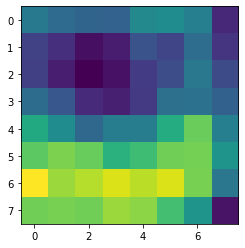

In [31]:
plt.imshow(net.regis_net.net.decode.weight.cpu().detach()[27][1])

In [ ]:
model.t.d_model

In [55]:
model.t.forward?

In [37]:
torch.Parameter

AttributeError: module 'torch' has no attribute 'Parameter'

In [39]:
torch.randn((

In [2]:
nn.Transformer?